In [1]:
#Importing libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras import models

In [2]:
#Defining the model using Functional API
inputs=Input(shape=(28, 28, 1))  #Dimensions 28*28*1 color channel

#5 3*3 filters are there. padding=valid means no padding, same means zero padding
#In zero padding, input image and output image dimensions would be the same
conv1=Conv2D(5, (3,3), padding='valid', activation='relu', name='conv1')(inputs)

#Apply dimensions formula and we will get 24. for parameters, we know that in 3*3, there will be 9 values. For 5 of those, it will
#be 45 + 1= 46 and for 2 of those it will be 46*2=92
conv2=Conv2D(2, (3,3), padding='valid', activation='relu', name='conv2')(conv1)

#After flattening, 24*24=576 and for 2 of those, 576*2=1152
flatten=Flatten(name='flatten')(conv2)

#For output, 1152*10=11520 + 10 (bias)= 11530
outputs=Dense(10, activation='softmax', name='output')(flatten)

model=models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 5)         50        
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 2)         92        
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
output (Dense)               (None, 10)                11530     
Total params: 11,672
Trainable params: 11,672
Non-trainable params: 0
_________________________________________________________________


# Using mnist dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pkl

In [4]:
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()
print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


This dataset consists of number images in blurred form and gray-scaled. We need to classify them using cnn

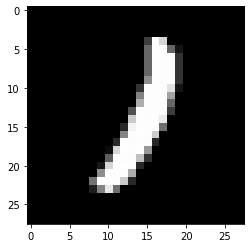

In [5]:
plt.imshow(x_train[78], cmap='gray')

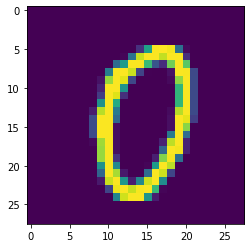

In [6]:
plt.imshow(x_train[1000])

In [8]:
#Normalizing the input for better convergence and minimum point of cost fn faster
x_train, x_test= x_train/255.0, x_test/255.0 #pixel range is 0-255

In [9]:
#For adding the color channel to the data
x_train, x_test=np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Model building

In [10]:
inputs=Input(shape=(28, 28, 1)) #Functional API

#32 3*3 filters
conv1=Conv2D(32, (3,3), padding='valid', activation='relu', name='conv1')(inputs)
max1=MaxPooling2D((2, 2), (2, 2), name='maxpool_1')(conv1)
#Maxpooling 2*2 dimension of kernel with stride=2

#64 3*3 filters
conv2=Conv2D(64, (3,3), padding='valid', activation='relu', name='conv2')(max1)
max2=MaxPooling2D((2, 2), (2, 2), name='maxpool_2')(conv2)

conv3=Conv2D(128, (3, 3), padding='valid', activation='relu', name='conv3')(max2)

flatten=Flatten(name='flatten')(conv3)

#Dense layer 
dense1=Dense(128, activation='relu', name='dense1')(flatten)
outputs=Dense(10, activation='softmax', name='output')(dense1)

model=models.Model(inputs,outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0   

- 32* (9+1)= 320 #Weight+bias parameters

- 26+2(0)-2 / 2 + 1= 13 #pooling dim value

- 13+2(0) - 3/1 +1 = 11 #conv2 dim

- (3 * 3 * 32) + 1= 289 * 64= 18496 #param

- 11 + 2(0) -2 /2 +1 = 4.5+ 1= 5 (round off) # maxpool2 dim

- (3 * 3 * 64) + 1 =577 * 128 =73856 #conv3

- (3 * 3 * 128)= 1152 #flatten

- 1152 * 128= 147456 + 128 =147584 #Dense1 param

- 128 * 10= 1280+10= 1290 #output

In [11]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Fit the model
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 595us/sample - loss: 0.1270 - accuracy: 0.9599
Epoch 2/5
60000/60000 [==============================] - 31s 519us/sample - loss: 0.0431 - accuracy: 0.9868
Epoch 3/5
60000/60000 [==============================] - 34s 560us/sample - loss: 0.0306 - accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 33s 545us/sample - loss: 0.0225 - accuracy: 0.9928
Epoch 5/5
60000/60000 [==============================] - 31s 514us/sample - loss: 0.0175 - accuracy: 0.9945


In [13]:
#Calculating for test data
test_loss, test_acc=model.evaluate(x_test, y_test)
print('Test loss: {0} - Test Acc: {1}'. format(test_loss, test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.0341295118832335 - Test Acc: 0.989799976348877
